In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df= pd.read_csv('weather_history.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [7]:
df.shape

(96453, 12)

In [8]:
#df["Formatted Date"].str[:10].str.split("-").str[11:13].str.split(":").str[0]
# df["Formatted Date"].str[11:13].str.split(":").str[0]

In [9]:
df['Date']= df["Formatted Date"].str[:10]

In [10]:
df.head(3)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01


In [11]:
df['Summary'].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [12]:
df['Summary']= df['Summary'].replace({'Partly Cloudy':'Cloudy', 
                       'Mostly Cloudy':'Cloudy' ,
                       'Overcast': 'Overcast',
                       'Clear': 'Sunny',
                       'Foggy': 'Foggy',
                      'Breezy and Overcast': 'Overcast', 
                       'Breezy and Mostly Cloudy': 'Overcast',
                       'Breezy and Partly Cloudy': 'Cloudy',
                       'Dry and Partly Cloudy': 'Cloudy',                     
                       'Windy and Partly Cloudy': 'Cloudy',                   
                       'Light Rain': 'Rain',                               
                       'Breezy': 'Rain',                                   
                       'Windy and Overcast': 'Overcast',                       
                       'Humid and Mostly Cloudy': 'Cloudy',                  
                       'Drizzle': 'Rain',                                  
                       'Windy and Mostly Cloudy': 'Cloudy',                   
                       'Breezy and Foggy': 'Foggy',                          
                       'Dry': 'Sunny',                                  
                       'Humid and Partly Cloudy': 'Cloudy',             
                       'Dry and Mostly Cloudy': 'Cloudy',               
                       'Rain': 'Rain',                                    
                       'Windy': 'Rain',                                      
                       'Humid and Overcast': 'Overcast',                         
                       'Windy and Foggy': 'Foggy',                            
                       'Breezy and Dry': 'Rain',                     
                       'Windy and Dry': 'Rain', 
                        'Dangerously Windy and Partly Cloudy': 'Cloudy'})

In [13]:
df['Summary'].value_counts()

Cloudy      60473
Overcast    17693
Sunny       10924
Foggy        7187
Rain          176
Name: Summary, dtype: int64

In [14]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [15]:
df['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [16]:
df['Apparent Temperature (C)'].unique()

array([ 7.38888889,  7.22777778,  9.37777778, ..., 12.14444444,
        9.73888889,  9.23333333])

#### There is only one unique value so no need of Loud Cover

In [17]:
df['Loud Cover'].unique()

array([0.])

In [18]:
df.drop(['Loud Cover'], axis=1, inplace=True)

In [19]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
Date                          0
dtype: int64

In [20]:
df['Date']= pd.to_datetime(df['Date'])

In [21]:
df.drop(['Formatted Date'], axis=1, inplace=True)

In [22]:
df.set_index(['Date'], inplace=True)

In [23]:
df.head(2)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Date,,,,,,,,,,
2006-04-01,Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
2006-04-01,Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.


In [24]:
df['Precip Type'].fillna(method='ffill', inplace=True)

In [25]:
df1=df.reset_index()['Temperature (C)']

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (15,6))
plt.plot(df1)

In [ ]:
df.hist(figsize=(15, 12))

In [ ]:
import matplotlib.pyplot as plt
x1 = np.linspace(2000, 96453, 96453)
y1 = df['Temperature (C)']
y2 = df['Apparent Temperature (C)']
plt.plot(x1, y1)
plt.plot(x1, y2)
plt.figure(figsize=(200, 200))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

color={2:'blue',
       3:'green',
       4:'black',
       5:'red',
       6:'violet',
       7:'brown',
       8:'orange'}
for index in range(2,9):
    plt.figure(figsize=(12,5))
    plt.xlabel('Year', fontsize=12)
    plt.title('{}'.format(df.columns[index].upper()), fontsize=15)
    sns.lineplot(data=df.iloc[:,index], color=color[index], marker='o')
    plt.show()

In [ ]:
df.corr()

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data = df.corr(), annot = True, cmap = 'Blues')
plt.show()

In [26]:
# As the correlation between Temperature (C) and Apparent Temperature (C) is almost 1 so we are dropping Apparent Temperature (C)
df.drop(['Apparent Temperature (C)'],axis= 1, inplace=True)

In [27]:
indices = ['Temperature (C)', 'Humidity', 'Precip Type', 'Summary']
ex_data = df.loc[:,indices]
ex_data

,Temperature (C),Humidity,Precip Type,Summary
Date,,,,
2006-04-01,9.472222,0.89,rain,Cloudy
2006-04-01,9.355556,0.86,rain,Cloudy
2006-04-01,9.377778,0.89,rain,Cloudy
2006-04-01,8.288889,0.83,rain,Cloudy
2006-04-01,8.755556,0.83,rain,Cloudy
...,...,...,...,...
2016-09-09,26.016667,0.43,rain,Cloudy
2016-09-09,24.583333,0.48,rain,Cloudy
2016-09-09,22.038889,0.56,rain,Cloudy


NameError: name 'sns' is not defined

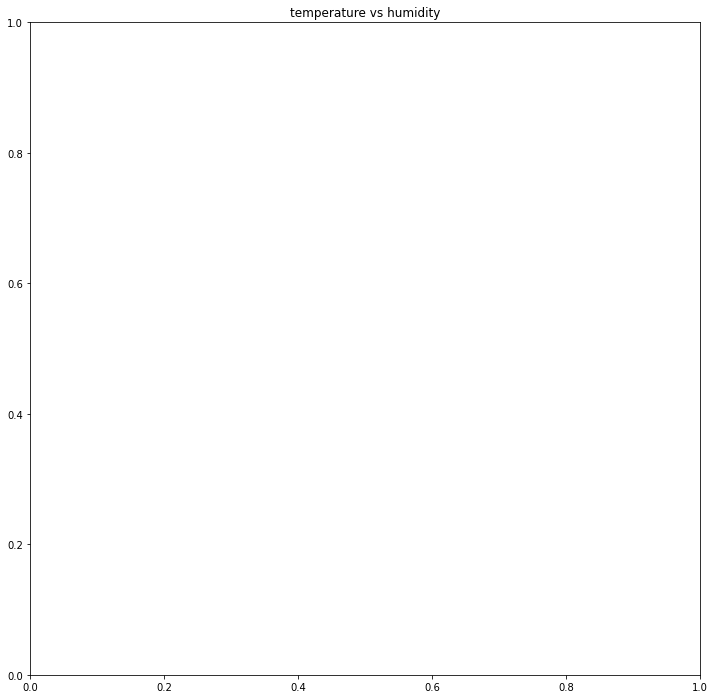

In [28]:
#scatter plot for temperature and humidity by summary
plt.figure(figsize = (12,12))
plt.title('temperature vs humidity')
sns.scatterplot(x=ex_data.iloc[:,0], y=ex_data.iloc[:,1], hue= ex_data.iloc[:,3], s=75, alpha = 0.4)
plt.show()

In [ ]:
#scatter plot for temperature and humidity by percip type

plt.figure(figsize = (12,6))
print(ex_data.describe())
plt.title('Temperature vs Humidity')
sns.scatterplot(x=ex_data.iloc[:,0], y=ex_data.iloc[:,1], hue= ex_data.iloc[:,2], s=50, alpha = 0.4)
plt.show()

In [ ]:
df.head(2)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96453 entries, 2006-04-01 to 2016-09-09
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Summary                 96453 non-null  object 
 1   Precip Type             96453 non-null  object 
 2   Temperature (C)         96453 non-null  float64
 3   Humidity                96453 non-null  float64
 4   Wind Speed (km/h)       96453 non-null  float64
 5   Wind Bearing (degrees)  96453 non-null  float64
 6   Visibility (km)         96453 non-null  float64
 7   Pressure (millibars)    96453 non-null  float64
 8   Daily Summary           96453 non-null  object 
dtypes: float64(6), object(3)
memory usage: 7.4+ MB


In [30]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

df['Summary'] = le.fit_transform(pd.DataFrame(df['Summary']))
df['Precip Type'] = le.fit_transform(pd.DataFrame(df['Precip Type']))
df['Daily Summary'] = le.fit_transform(pd.DataFrame(df['Daily Summary']))

C:\Program Files\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [31]:
df = df.groupby('Date').mean()

In [32]:
df['Date']= pd.to_datetime(df.index)

In [33]:
df.set_index('Date', inplace=True)

In [34]:
df.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', name='Date', length=4018, freq=None)

In [35]:
def imputation(data):
    dummy = []
    r = pd.date_range(start = data.index.min(), end = data.index.max(), freq = 'D')
    dummy = data.reindex(r).fillna(' ').rename_axis('Date').reset_index()
    dummy = dummy.replace(' ',np.nan)
    dummy = dummy.ffill()
    dummy.set_index('Date', inplace=True)
    return dummy

In [36]:
df = imputation(df)
df

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Date,,,,,,,,,
2006-01-01,0.666667,0.000000,3.873148,0.818333,21.372750,142.041667,11.112354,1012.279167,111
2006-01-02,1.916667,0.000000,5.418519,0.844583,17.551683,161.958333,8.956967,1010.131667,143
2006-01-03,1.166667,0.000000,2.319444,0.898333,8.417617,248.541667,9.011975,1020.805000,111
2006-01-04,2.000000,0.000000,2.274074,0.905417,11.579925,46.916667,8.339129,981.826667,143
2006-01-05,1.666667,0.000000,2.698148,0.948333,9.515100,140.375000,4.628750,935.988333,35
...,...,...,...,...,...,...,...,...,...
2016-12-27,0.000000,0.500000,0.280324,0.890000,10.980200,185.875000,7.303362,1020.304583,111
2016-12-28,0.000000,0.541667,0.224306,0.890000,10.969467,186.166667,7.304704,1020.334583,111
2016-12-29,0.000000,0.541667,0.169676,0.889583,10.892992,186.041667,7.309400,1020.365833,111


In [37]:
df1=df.reset_index()['Temperature (C)']

### Temperature Data 


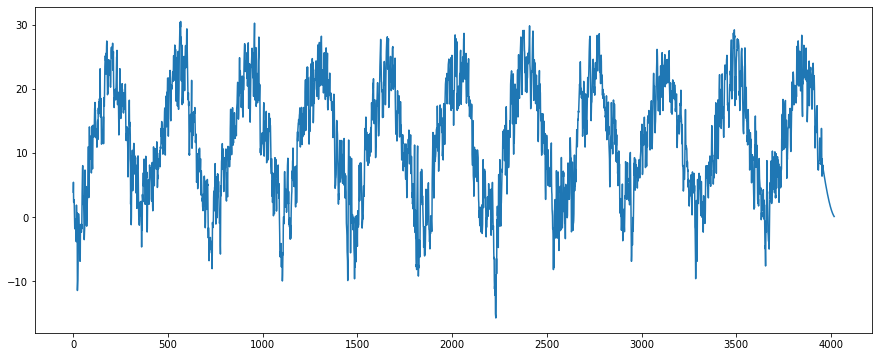

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize= (15,6))
plt.plot(df1)

In [39]:
df1= pd.DataFrame()
df1

""


In [40]:
from sklearn.preprocessing import MinMaxScaler
mm1= MinMaxScaler()
mm1.fit(pd.DataFrame(df['Temperature (C)']))
df1 = mm1.transform(pd.DataFrame(df['Temperature (C)']))

In [41]:
from sklearn.preprocessing import MinMaxScaler
mm= MinMaxScaler()

In [42]:
df['Temperature (C)']= mm.fit_transform(pd.DataFrame(df['Temperature (C)']))
df['Humidity'] = mm.fit_transform(pd.DataFrame(df['Humidity']))
df['Wind Speed (km/h)'] = mm.fit_transform(pd.DataFrame(df['Wind Speed (km/h)']))
df['Wind Bearing (degrees)'] = mm.fit_transform(pd.DataFrame(df['Wind Bearing (degrees)']))
df['Visibility (km)'] = mm.fit_transform(pd.DataFrame(df['Visibility (km)']))
df['Pressure (millibars)'] = mm.fit_transform(pd.DataFrame(df['Pressure (millibars)']))


In [43]:
df.head(3)

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Date,,,,,,,,,
2006-01-01,0.666667,0.0,0.424289,0.746563,0.579082,0.407890,0.697797,0.956281,111
2006-01-02,1.916667,0.0,0.457663,0.784220,0.469149,0.468327,0.562450,0.953281,143
2006-01-03,1.166667,0.0,0.390736,0.861327,0.206357,0.731066,0.565904,0.968191,111


In [44]:
df['Summary'].unique()

array([0.66666667, 1.91666667, 1.16666667, 2.        , 1.66666667,
       1.625     , 1.        , 2.25      , 1.58333333, 1.04166667,
       1.45833333, 1.5       , 1.95833333, 1.29166667, 0.5       ,
       2.83333333, 2.70833333, 1.125     , 0.58333333, 1.75      ,
       1.79166667, 1.70833333, 2.04166667, 1.33333333, 0.16666667,
       1.41666667, 1.20833333, 0.45833333, 0.        , 0.33333333,
       0.83333333, 0.91666667, 1.83333333, 1.08333333, 2.41666667,
       0.75      , 2.45833333, 0.08333333, 2.66666667, 1.375     ,
       1.54166667, 3.375     , 1.39130435, 0.41666667, 0.375     ,
       2.33333333, 1.25      , 0.125     , 0.29166667, 0.79166667,
       0.625     , 0.25      , 0.95833333, 0.54166667, 1.875     ,
       2.5       , 2.16666667, 3.66666667, 3.83333333, 0.96      ,
       2.625     , 0.875     , 2.20833333, 2.08333333, 3.5       ,
       2.75      , 0.69565217, 3.16666667, 4.        , 0.70833333,
       3.08333333, 0.20833333, 3.        , 3.875     , 3.33333

In [45]:
cat_names=['Cloudy', 'Overcast', 'Sunny', 'Foggy',  'Rainy' ]

In [46]:
cat_names= pd.DataFrame(cat_names, columns=['cat_name'])

In [47]:
cat_names['Summary'] = le.fit_transform(cat_names['cat_name'])

In [48]:
df['Summary']= round(df['Summary'])
df['Summary']

Date
2006-01-01    1.0
2006-01-02    2.0
2006-01-03    1.0
2006-01-04    2.0
2006-01-05    2.0
             ... 
2016-12-27    0.0
2016-12-28    0.0
2016-12-29    0.0
2016-12-30    0.0
2016-12-31    0.0
Name: Summary, Length: 4018, dtype: float64

In [49]:
df['Summary'].unique()

array([1., 2., 0., 3., 4.])

In [50]:
df.head()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Date,,,,,,,,,
2006-01-01,1.0,0.0,0.424289,0.746563,0.579082,0.407890,0.697797,0.956281,111
2006-01-02,2.0,0.0,0.457663,0.784220,0.469149,0.468327,0.562450,0.953281,143
2006-01-03,1.0,0.0,0.390736,0.861327,0.206357,0.731066,0.565904,0.968191,111
2006-01-04,2.0,0.0,0.389756,0.871488,0.297339,0.119231,0.523653,0.913738,143
2006-01-05,2.0,0.0,0.398914,0.933054,0.237933,0.402832,0.290661,0.849702,35


In [51]:
X= df.drop(['Summary'], axis=1)
y= df['Summary']

In [52]:
X

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Date,,,,,,,,
2006-01-01,0.000000,0.424289,0.746563,0.579082,0.407890,0.697797,0.956281,111
2006-01-02,0.000000,0.457663,0.784220,0.469149,0.468327,0.562450,0.953281,143
2006-01-03,0.000000,0.390736,0.861327,0.206357,0.731066,0.565904,0.968191,111
2006-01-04,0.000000,0.389756,0.871488,0.297339,0.119231,0.523653,0.913738,143
2006-01-05,0.000000,0.398914,0.933054,0.237933,0.402832,0.290661,0.849702,35
...,...,...,...,...,...,...,...,...
2016-12-27,0.500000,0.346699,0.849372,0.280084,0.540903,0.458612,0.967492,111
2016-12-28,0.541667,0.345489,0.849372,0.279775,0.541788,0.458697,0.967534,111
2016-12-29,0.541667,0.344310,0.848775,0.277575,0.541409,0.458992,0.967578,111


In [53]:
y.shape

(4018,)

In [54]:
y

Date
2006-01-01    1.0
2006-01-02    2.0
2006-01-03    1.0
2006-01-04    2.0
2006-01-05    2.0
             ... 
2016-12-27    0.0
2016-12-28    0.0
2016-12-29    0.0
2016-12-30    0.0
2016-12-31    0.0
Name: Summary, Length: 4018, dtype: float64

In [55]:
cat_names

,cat_name,Summary
0,Cloudy,0
1,Overcast,2
2,Sunny,4
3,Foggy,1
4,Rainy,3


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.33, random_state=42)

In [57]:
X_train.shape,y_train.shape

((2692, 8), (2692,))

## Decision Tree Classifier

In [64]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, y_train)

In [ ]:
prediction = dt.predict(X_test)

In [ ]:
print(accuracy_score(prediction, y_test))
print("============")
print("============")
print(classification_report(prediction, y_test))

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_dict = {
                'criterion': ['entropy'],
                'max_depth': [1,2,3,4,8,9,10,15,20]
            }
grid = GridSearchCV(dt, param_grid=param_dict, cv=10, n_jobs=-1)



In [ ]:
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_estimator_)
bs= grid.best_score_

In [ ]:
bs

##  Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=100,n_jobs=-1,verbose=0,random_state=42)

In [59]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [60]:
rf.score(X_train, y_train)

1.0

In [61]:
pred= rf.predict(X_test)
pred

array([1., 0., 0., ..., 0., 1., 2.])

In [65]:
print(accuracy_score(pred, y_test))
print("============")
print("============")
print(classification_report(pred, y_test))

0.702865761689291
              precision    recall  f1-score   support

         0.0       0.74      0.80      0.77       446
         1.0       0.82      0.64      0.72       728
         2.0       0.42      0.72      0.53       137
         3.0       0.16      0.44      0.24         9
         4.0       0.50      1.00      0.67         6

    accuracy                           0.70      1326
   macro avg       0.53      0.72      0.58      1326
weighted avg       0.74      0.70      0.71      1326



In [77]:
from sklearn.model_selection import RandomizedSearchCV

In [79]:
param_dict= {'bootstrap': [True, False],
             'max_depth': [10, 20, 30, 40, 50,70,100,200, None],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 2, 4,6,8],
             'min_samples_split': [2, 5, 10],
             'n_estimators': [5,10,15,20,50,100,200,300]}

            

In [81]:
grid= RandomizedSearchCV(estimator=rf, param_distributions=param_dict, n_iter=100, cv=10, verbose=2,
                               random_state=42, n_jobs=-1)

In [82]:
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_estimator_)
bs= grid.best_score_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': True}
RandomForestClassifier(max_depth=100, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200, n_jobs=-1,
                       random_state=42)


In [83]:
bs

0.709158749827895

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

In [ ]:
pred= lr.predict(X_test)

In [ ]:
print(accuracy_score(pred, y_test))
print("============")
print("============")
print(classification_report(pred, y_test))

## Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svm = SVC()

In [ ]:
svm.fit(X_train, y_train)

In [ ]:
svm.score(X_train, y_train)

In [ ]:
prediction= svm.predict(X_test)
prediction

In [ ]:
print(accuracy_score(prediction, y_test))
print("============")
print("============")
print(classification_report(prediction, y_test))

## ARIMA

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf#library for ACF & PACF plots
from statsmodels.tsa.seasonal import seasonal_decompose#library for seasonal plot
from pmdarima import auto_arima#library for finding p, q, d
from statsmodels.tsa.stattools import adfuller#library for finding d
from statsmodels.tsa.arima_model import ARIMA#library for ARIMA model

In [ ]:
#Plot the Autocorrelation Function & Plot the partial autocorrelation function
def acf_pacf(df):
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = plot_acf(df,ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = plot_pacf(df,ax=ax2)


In [ ]:
#Decomposition Plot
def decomposition(df):
    decomposition = seasonal_decompose(df,freq=1,model = 'multiplicative')
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    plt.figure(figsize=(15, 10))
    plt.rcParams.update({'font.size': 15})
    fig = plt.figure(1)
    plt.subplot(411)
    plt.plot(df, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.ylabel('Year')
    plt.xlabel('Feature')

In [ ]:
#to find p, d, q
def adfuller_test(Summary):
    result=adfuller(Summary)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
# Forecast for test data
def forecast_test(fitted, train, test):
    fc, se, conf = fitted.forecast(len(test), alpha=0.05)  # 95% confidence
    fc_series_test = pd.Series(fc, index = test.index)
    lower_series_test = pd.Series(conf[:, 0], index=test.index)
    upper_series_test = pd.Series(conf[:, 1], index=test.index)
    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(train, label='Training Data')
    plt.plot(test, color = 'blue', label='Actual')
    plt.plot(fc_series_test, color = 'orange',label='Predicted')
    plt.fill_between(lower_series_test.index, lower_series_test, upper_series_test, color='k', alpha=.10)
    plt.title('Weather Prediction')
    plt.xlabel('Time')
    plt.ylabel('Feature')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()
    #Errors - ARIMA model
    mse = mean_squared_error(test, fc_series_test)
    print('MSE: '+str(mse))
    mae = mean_absolute_error(test, fc_series_test)
    print('MAE: '+str(mae))
    rmse = mean_squared_error(test, fc_series_test, squared=False)
    print('RMSE: '+str(rmse))


In [ ]:
def fore(col_name):
    model_auto = auto_arima(df[col_name][:3000].dropna(), seasonal = False)
    print(model_auto.summary())
    arima_model = ARIMA(df[col_name][:3000], order=model_auto.order)
    fitted_y = arima_model.fit(disp = -1)
    print(fitted_y.summary()) 
    forecast_test(fitted_y, df[col_name][:3000], df[col_name][3000:4000])

In [ ]:
import warnings
warnings.filterwarnings("ignore")
fore('Humidity')

In [ ]:
import warnings
warnings.filterwarnings("ignore")
fore('Temperature (C)')

In [ ]:
import warnings
warnings.filterwarnings("ignore")
fore('Wind Speed (km/h)')

## LSTM

In [ ]:
df1= np.array(df1).reshape(-1,1)

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

In [ ]:
print(X_test.shape), print(ytest.shape)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=mm1.inverse_transform(train_predict)
test_predict=mm1.inverse_transform(test_predict)

In [ ]:
test_predict

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize= (20,8))
plt.plot(mm1.inverse_transform(df1), label= 'Full Data')
plt.plot(trainPredictPlot, label= 'Train Data')
plt.plot(testPredictPlot, label= 'Test Data')
plt.legend()
plt.show()

In [ ]:
len(test_data)

In [ ]:
x_input=test_data[1307:].reshape(1,-1)
x_input.shape

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

In [ ]:

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(df1)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(day_new,mm1.inverse_transform(df1[3918:]))
plt.plot(day_pred,mm1.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[3920:])

In [ ]:
df3=mm1.inverse_transform(df3).tolist()

In [ ]:
df3

### Forecasted plot for next 30 days 

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df3)
plt.axvspan(3950, 4050, color="red", alpha=0.5)
plt.grid()

                          The Highlited Part is our next 30 Days Forecasting